# Titanic Case Study

# Variable Notes

- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.

# Perform followings on dataset:
- Read the dataset and display top/bottom rows
- Get a summary of whole dataset
- Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
- Drop those columns which needs to be dropped
- Find out the data type of each column
- Find out the number of entries in each column
- Find out which columns is having more number of missing values
- Replace missing values in each column and provide the reason for choosing one function to replace missing values
- Fix the issue with fare column usign regex flag then type casting of the whole column 
- Find out total number of Male/Female passengers
- Find out total number of passengers in each passenger class
- Find out total number of Survived/Not-survived passengers
- Find out total number of passengers of various age groups (0-30, 31-60 and >60)
- Find out which age group survived
- Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(np.random.randint(1,10,20).reshape(5,4),columns=list("ABCD"))

In [3]:
df

,A,B,C,D
0,4,5,3,1
1,2,6,4,7
2,9,6,1,7
3,3,7,7,7
4,3,5,8,2


In [6]:
df.iloc[:,:3]

,A,B,C
0,4,5,3
1,2,6,4
2,9,6,1
3,3,7,7
4,3,5,8


In [8]:
df = pd.read_csv("titanic_dataset_modified.csv")

#### Read the dataset and display top/bottom rows

In [9]:
df.head(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
df.tail(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,$7.23,NaN,C,NaN,NaN,NaN
1308,1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,$7.88,NaN,S,NaN,NaN,NaN


#### Get a summary of whole dataset

In [11]:
df.describe() # by default it will consider ony numberical columns

,Unnamed: 0,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [12]:
df.describe(include="all")

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308,295,1307,486,121.000000,745
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,263,186,3,27,NaN,369
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,$8.05,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,60,6,914,39,NaN,64
mean,654.000000,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,NaN,NaN,NaN,NaN,160.809917,NaN
std,378.020061,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,NaN,NaN,NaN,NaN,97.696922,NaN
min,0.000000,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,327.000000,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,72.000000,NaN
50%,654.000000,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,155.000000,NaN
75%,981.000000,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,256.000000,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
gender      1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null object
embarked    1307 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 81.9+ KB


#### Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?

In [13]:
df.head(1)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"


#### Drop those columns which needs to be dropped

In [16]:
df.drop(["Unnamed: 0","name","ticket","cabin","boat","body","home.dest"],axis=1,inplace=True)

In [17]:
df.head(3)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,$211.34,S
1,1,1,male,0.9167,1,2,$151.55,S
2,1,0,female,2.0000,1,2,$151.55,S


#### Drop those columns which needs to be dropped

#### Find out the data type of each column

In [18]:
df.dtypes

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
dtype: object

#### Find out the number of entries in each column

In [ ]:
# size: will take all entries including NaN
# count: will take only non-null values

In [24]:
for k in df.keys():
    print("Total number of values in {} is {}".format(k,df[k].count()))

Total number of values in pclass is 1309
Total number of values in survived is 1309
Total number of values in gender is 1309
Total number of values in age is 1046
Total number of values in sibsp is 1309
Total number of values in parch is 1309
Total number of values in fare is 1308
Total number of values in embarked is 1307


#### Find out which columns is having more number of missing values

In [27]:
df.isnull().sum()

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [26]:
df.age.isnull().sum()

263

###### write for loop to display % of missing values in each column

In [39]:
for k in df.keys():
    print("% of missing values in {} is {:.2f}%".format(k,((df[k].isnull().sum())/df.age.size)*100))

% of missing values in pclass is 0.00%
% of missing values in survived is 0.00%
% of missing values in gender is 0.00%
% of missing values in age is 20.09%
% of missing values in sibsp is 0.00%
% of missing values in parch is 0.00%
% of missing values in fare is 0.08%
% of missing values in embarked is 0.15%


#### Replace missing values in each column and provide the reason for choosing one function to replace missing values

In [40]:
# age,embarked,fare

In [44]:
df.age.mean()

29.8811345124283

In [46]:
df.age.fillna(df.age.mean(),inplace=True)

In [47]:
df.age.isnull().sum()

0

###### embarked

In [49]:
df.embarked.isnull().sum()

2

###### How to get count of unique values

In [50]:
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [60]:
df.embarked.mode() # output is Series

0    S
dtype: object

In [59]:
df.embarked.mode()[0]

'S'

In [54]:
df.embarked.fillna(df.embarked.mode()[0],inplace=True)

In [55]:
df.embarked.isnull().sum()

0

#### Fix the issue with fare column usign regex flag then type casting of the whole column

In [61]:
df.fare.head(4)

0    $211.34
1    $151.55
2    $151.55
3    $151.55
Name: fare, dtype: object

In [66]:
df.fare.replace({"\$":""},regex=True,inplace=True)

In [68]:
df.fare.head(5)

0    211.34
1    151.55
2    151.55
3    151.55
4    151.55
Name: fare, dtype: object

In [70]:
df.fare = df.fare.astype("float64")

In [71]:
df.fare.head(5)

0    211.34
1    151.55
2    151.55
3    151.55
4    151.55
Name: fare, dtype: float64

In [73]:
df.fare.isnull().sum()

1

In [74]:
df.fare.fillna(df.fare.mean(),inplace=True)

In [75]:
df.fare.isnull().sum()

0

In [76]:
df.isnull().sum()

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

# break:will be back by 2:05PM

###### dump clean data to a file

In [79]:
df.to_csv("titanic_clean_data.csv")

In [80]:
df.to_html("titanic_clean_data.html")

#### Find out total number of Male/Female passengers

In [77]:
df.head(5)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.34,S
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2.0000,1,2,151.55,S
3,1,0,male,30.0000,1,2,151.55,S
4,1,0,female,25.0000,1,2,151.55,S


#### Find out total number of passengers in each passenger class

In [81]:
df.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

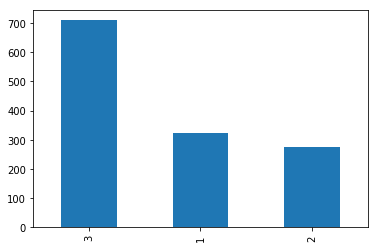

In [82]:
df.pclass.value_counts().plot(kind="bar")

#### Find out total number of Survived/Not-survived passengers

In [84]:
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

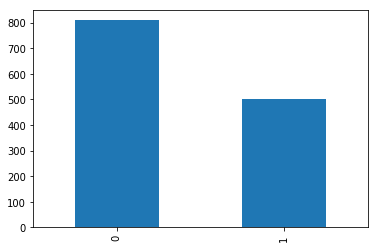

In [83]:
df.survived.value_counts().plot(kind="bar")

#### Find out total number of passengers of various age groups (0-30, 31-60 and >60)

#### Find out which age group survived

In [86]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.34,S
1,1,1,male,0.9167,1,2,151.55,S


In [88]:
# df[df.age<=30]

In [89]:
ag1 = df.age[df.age<=30]
ag2 = df.age[(df.age>30) & (df.age<=60)]
ag3 = df.age[df.age>60]

In [91]:
ag1.size # age.count , both will be samecv

872

In [92]:
ag2.size # age.count , both will be samecv

404

In [93]:
ag3.size # age.count , both will be samecv

33

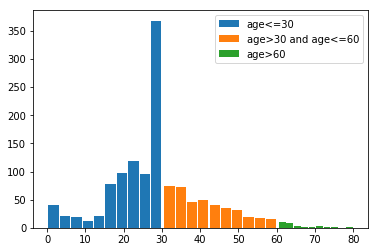

In [99]:
plt.hist(ag1,rwidth=.9,label="age<=30")
plt.hist(ag2,rwidth=.9,label="age>30 and age<=60")
plt.hist(ag3,rwidth=.9,label="age>60")
plt.legend()
plt.show()

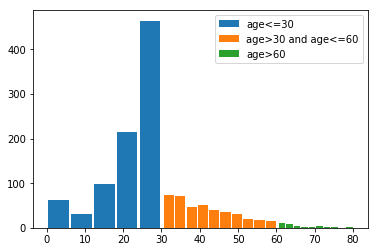

In [98]:
plt.hist(ag1,bins=5,rwidth=.9,label="age<=30")
plt.hist(ag2,rwidth=.9,label="age>30 and age<=60")
plt.hist(ag3,rwidth=.9,label="age>60")
plt.legend()
plt.show()

# Grouping concept

#### Find out total number of passengers city (embarked) ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [100]:
grp = df.groupby(["pclass","embarked"])

In [101]:
grp

In [104]:
grp.groups

{(1, 'C'): Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
             ...
             303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
            dtype='int64', length=141),
 (1, 'Q'): Int64Index([206, 207, 208], dtype='int64'),
 (1, 'S'): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,
             ...
             305, 306, 307, 309, 310, 311, 315, 318, 320, 321],
            dtype='int64', length=179),
 (2,
  'C'): Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
             491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
             547, 566],
            dtype='int64'),
 (2, 'Q'): Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'),
 (2, 'S'): Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
             ...
             590, 591, 592, 593, 594, 595, 596, 597, 598, 599],
            dtype='int64', length=242),
 (3,
  'C'): Int64Index([ 607,  613,  647,  648,  650,  651,  653,  

In [105]:
grp.groups.keys()

dict_keys([(1, 'C'), (1, 'Q'), (1, 'S'), (2, 'C'), (2, 'Q'), (2, 'S'), (3, 'C'), (3, 'Q'), (3, 'S')])

In [123]:
grp.groups.values()

dict_values([Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
            ...
            303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
           dtype='int64', length=141), Int64Index([206, 207, 208], dtype='int64'), Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,
            ...
            305, 306, 307, 309, 310, 311, 315, 318, 320, 321],
           dtype='int64', length=179), Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
            491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
            547, 566],
           dtype='int64'), Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'), Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
            ...
            590, 591, 592, 593, 594, 595, 596, 597, 598, 599],
           dtype='int64', length=242), Int64Index([ 607,  613,  647,  648,  650,  651,  653,  654,  657,  658,
            ...
            1286, 1299, 1300, 1301, 1302, 1303,

In [126]:
list(grp.groups.values())[0].size

141

In [106]:
len(grp.groups.keys())

9

In [111]:
grp.get_group((1, 'C')).pclass.count()

141

In [111]:
grp.get_group((1, 'C')).

141

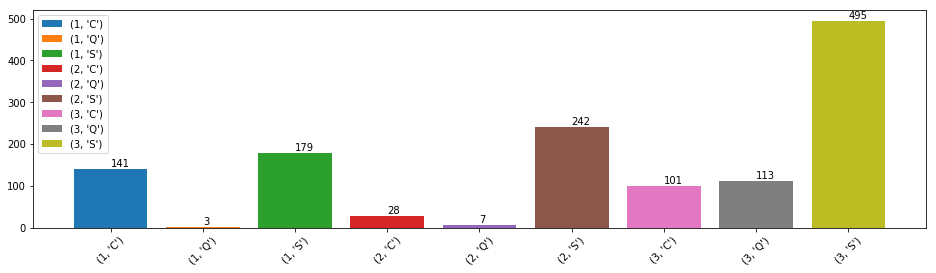

In [128]:
plt.figure(figsize=(16,4))
for k in grp.groups.keys():
    plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
    plt.text(str(k),grp.get_group(k).pclass.count()+5,grp.get_group(k).pclass.count())
plt.legend()
plt.xticks(rotation=45)
plt.show()

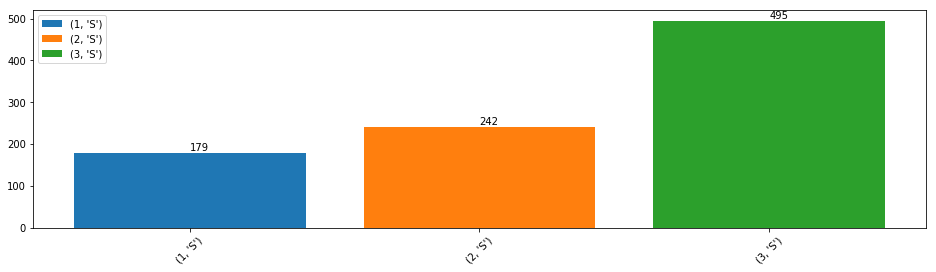

In [130]:
plt.figure(figsize=(16,4))
for k in grp.groups.keys():
    if "S" in k:
        plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
        plt.text(str(k),grp.get_group(k).pclass.count()+5,grp.get_group(k).pclass.count())
plt.legend()
plt.xticks(rotation=45)
plt.show()

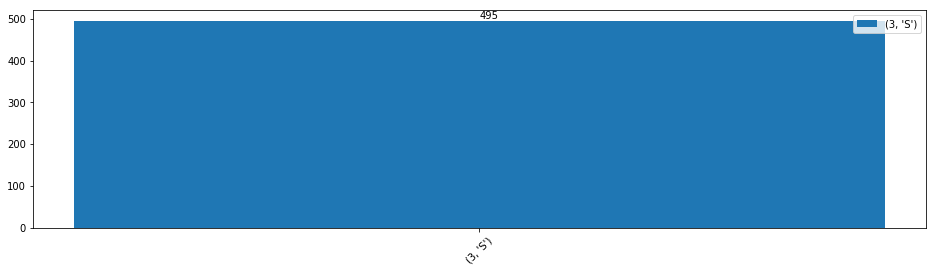

In [129]:
plt.figure(figsize=(16,4))
for k in grp.groups.keys():
    if "S" in k and 3 in k:
        plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
        plt.text(str(k),grp.get_group(k).pclass.count()+5,grp.get_group(k).pclass.count())
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Find out which sibsb survived

In [119]:
# try at home

# sorting, joining,merging,dropna

In [132]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("DEF"))

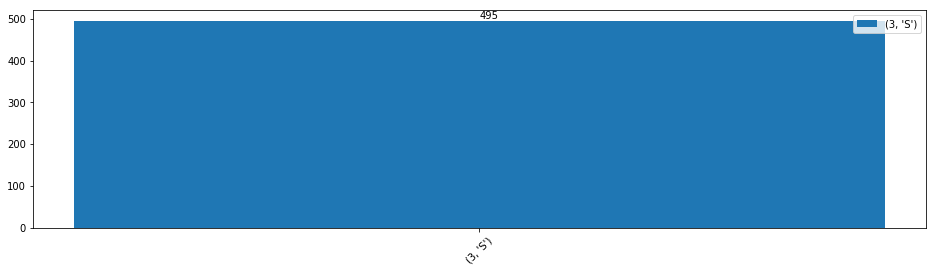

In [129]:
plt.figure(figsize=(16,4))
for k in grp.groups.keys():
    if "S" in k and 3 in k:
        plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
        plt.text(str(k),grp.get_group(k).pclass.count()+5,grp.get_group(k).pclass.count())
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [133]:
df1

,A,B,C
0,3,1,3
1,3,1,1
2,1,2,1
3,3,3,4
4,2,4,3


In [134]:
df2

,D,E,F
0,2,1,4
1,3,3,4
2,1,4,3
3,4,1,3
4,4,3,2


###### dropna

In [137]:
df1.A[2] = np.nan
df1.B[0] = np.nan

/Users/vigneshkarthick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vigneshkarthick/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [138]:
df1

,A,B,C
0,3.0,NaN,3
1,3.0,1.0,1
2,NaN,2.0,1
3,3.0,3.0,4
4,2.0,4.0,3


In [139]:
df1.dropna()

,A,B,C
1,3.0,1.0,1
3,3.0,3.0,4
4,2.0,4.0,3


In [140]:
df1.dropna(axis=1)

,C
0,3
1,1
2,1
3,4
4,3


In [141]:
df1.dropna(axis=1,how="all")

,A,B,C
0,3.0,NaN,3
1,3.0,1.0,1
2,NaN,2.0,1
3,3.0,3.0,4
4,2.0,4.0,3


#### Sorting

In [142]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("DEF"))

In [143]:
df1

,A,B,C
0,4,2,4
1,4,1,3
2,2,3,1
3,2,4,2
4,2,3,3


In [144]:
df1.sort_index()

,A,B,C
0,4,2,4
1,4,1,3
2,2,3,1
3,2,4,2
4,2,3,3


In [145]:
df1.sort_index(ascending=False)

,A,B,C
4,2,3,3
3,2,4,2
2,2,3,1
1,4,1,3
0,4,2,4


In [146]:
df1.sort_index(ascending=False,axis=1)

,C,B,A
0,4,2,4
1,3,1,4
2,1,3,2
3,2,4,2
4,3,3,2


In [148]:
df1

,A,B,C
0,4,2,4
1,4,1,3
2,2,3,1
3,2,4,2
4,2,3,3


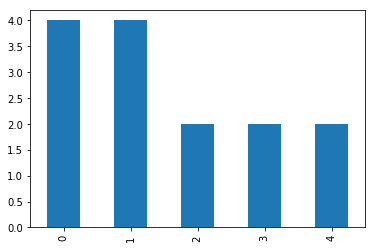

In [151]:
df1.A.plot(kind="bar")

In [149]:
df1.sort_values(by="A")

,A,B,C
2,2,3,1
3,2,4,2
4,2,3,3
0,4,2,4
1,4,1,3


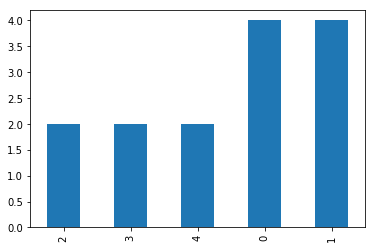

In [156]:
df1.sort_values(by="A").A.plot(kind="bar")

In [150]:
df1.sort_values(by="A",ascending=False)

,A,B,C
0,4,2,4
1,4,1,3
2,2,3,1
3,2,4,2
4,2,3,3


In [161]:
df1.sort_values(by=0,ascending=False,axis=1)

,A,C,B
0,4,4,2
1,4,3,1
2,2,1,3
3,2,2,4
4,2,3,3


### Joining

In [162]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("DEF"))

In [165]:
df1.join(df2)

,A,B,C,D,E,F
0,1,4,4,3,4,2
1,1,1,2,2,4,2
2,3,3,2,3,2,1
3,2,2,3,1,4,3
4,4,4,2,2,4,4


In [164]:
df1.join(df2[["D","F"]])

,A,B,C,D,F
0,1,4,4,3,2
1,1,1,2,2,2
2,3,3,2,3,1
3,2,2,3,1,3
4,4,4,2,2,4


In [166]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("CEF"))

In [170]:
df1.join(df2,lsuffix="_L",rsuffix="_R")

,A,B,C_L,C_R,E,F
0,2,2,1,1,2,3
1,1,2,1,2,4,3
2,3,4,4,1,4,4
3,2,1,3,3,2,3
4,1,1,4,1,3,1


In [172]:
df1.join(df2,on="A",lsuffix="_L",rsuffix="_R")

,A,B,C_L,C_R,E,F
0,2,2,1,1,4,4
1,1,2,1,2,4,3
2,3,4,4,3,2,3
3,2,1,3,1,4,4
4,1,1,4,2,4,3


#### Merging

In [175]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("CEF"))

In [177]:
df1

,A,B,C
0,2,2,1
1,1,2,3
2,2,3,2
3,4,4,3
4,1,3,4


In [178]:
df2

,C,E,F
0,4,2,3
1,1,1,3
2,1,4,1
3,1,3,4
4,4,4,2


In [179]:
df1.merge(df2,how="left")

,A,B,C,E,F
0,2,2,1,1.0,3.0
1,2,2,1,4.0,1.0
2,2,2,1,3.0,4.0
3,1,2,3,NaN,NaN
4,2,3,2,NaN,NaN
5,4,4,3,NaN,NaN
6,1,3,4,2.0,3.0
7,1,3,4,4.0,2.0


In [180]:
df1.merge(df2,how="left",indicator=True)

,A,B,C,E,F,_merge
0,2,2,1,1.0,3.0,both
1,2,2,1,4.0,1.0,both
2,2,2,1,3.0,4.0,both
3,1,2,3,NaN,NaN,left_only
4,2,3,2,NaN,NaN,left_only
5,4,4,3,NaN,NaN,left_only
6,1,3,4,2.0,3.0,both
7,1,3,4,4.0,2.0,both


In [181]:
df1.merge(df2,how="inner",indicator=True)

,A,B,C,E,F,_merge
0,2,2,1,1,3,both
1,2,2,1,4,1,both
2,2,2,1,3,4,both
3,1,3,4,2,3,both
4,1,3,4,4,2,both


In [183]:
df1.merge(df2,how="right",indicator=True)

,A,B,C,E,F,_merge
0,2,2,1,1,3,both
1,2,2,1,4,1,both
2,2,2,1,3,4,both
3,1,3,4,2,3,both
4,1,3,4,4,2,both


In [184]:
df1.merge(df2,how="outer",indicator=True)

,A,B,C,E,F,_merge
0,2,2,1,1.0,3.0,both
1,2,2,1,4.0,1.0,both
2,2,2,1,3.0,4.0,both
3,1,2,3,NaN,NaN,left_only
4,4,4,3,NaN,NaN,left_only
5,2,3,2,NaN,NaN,left_only
6,1,3,4,2.0,3.0,both
7,1,3,4,4.0,2.0,both


In [185]:
df1.append(df2)

/Users/vigneshkarthick/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C,E,F
0,2.0,2.0,1,NaN,NaN
1,1.0,2.0,3,NaN,NaN
2,2.0,3.0,2,NaN,NaN
3,4.0,4.0,3,NaN,NaN
4,1.0,3.0,4,NaN,NaN
0,NaN,NaN,4,2.0,3.0
1,NaN,NaN,1,1.0,3.0
2,NaN,NaN,1,4.0,1.0
3,NaN,NaN,1,3.0,4.0
4,NaN,NaN,4,4.0,2.0


In [186]:
df1.append(df2,ignore_index=True)

/Users/vigneshkarthick/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C,E,F
0,2.0,2.0,1,NaN,NaN
1,1.0,2.0,3,NaN,NaN
2,2.0,3.0,2,NaN,NaN
3,4.0,4.0,3,NaN,NaN
4,1.0,3.0,4,NaN,NaN
5,NaN,NaN,4,2.0,3.0
6,NaN,NaN,1,1.0,3.0
7,NaN,NaN,1,4.0,1.0
8,NaN,NaN,1,3.0,4.0
9,NaN,NaN,4,4.0,2.0


In [187]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))

In [189]:
df1.append(df2,ignore_index=True)

,A,B,C
0,2,3,2
1,1,1,2
2,2,4,1
3,2,3,4
4,2,2,1
5,3,4,2
6,3,2,2
7,4,2,4
8,1,2,3
9,2,2,4


# DateTime

In [195]:
date = pd.date_range(start="01-01-2019",end="15-02-2019",freq="D")

In [194]:
pd.date_range(start="01-01-2019",end="15-02-2019",freq="D")

46

In [196]:
S = pd.Series(np.random.randint(1,100,46),index=date)
S

2019-01-01    31
2019-01-02    62
2019-01-03    27
2019-01-04    64
2019-01-05    81
2019-01-06    88
2019-01-07    15
2019-01-08    21
2019-01-09     9
2019-01-10    47
2019-01-11    19
2019-01-12    35
2019-01-13    27
2019-01-14    26
2019-01-15    44
2019-01-16    41
2019-01-17    28
2019-01-18    58
2019-01-19    61
2019-01-20    55
2019-01-21    96
2019-01-22    52
2019-01-23    33
2019-01-24    74
2019-01-25    73
2019-01-26    62
2019-01-27    42
2019-01-28    31
2019-01-29     9
2019-01-30    18
2019-01-31    79
2019-02-01    49
2019-02-02    64
2019-02-03    69
2019-02-04    14
2019-02-05    27
2019-02-06    55
2019-02-07    51
2019-02-08    60
2019-02-09    35
2019-02-10    88
2019-02-11    28
2019-02-12    95
2019-02-13     2
2019-02-14    32
2019-02-15    33
Freq: D, dtype: int64

In [197]:
S.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15'],
              dtype='datetime64[ns]', freq='D')

# Apply

In [199]:
lam = lambda x:x+20

In [200]:
df.pclass.apply(lam)

0       21
1       21
2       21
3       21
4       21
5       21
6       21
7       21
8       21
9       21
10      21
11      21
12      21
13      21
14      21
15      21
16      21
17      21
18      21
19      21
20      21
21      21
22      21
23      21
24      21
25      21
26      21
27      21
28      21
29      21
        ..
1279    23
1280    23
1281    23
1282    23
1283    23
1284    23
1285    23
1286    23
1287    23
1288    23
1289    23
1290    23
1291    23
1292    23
1293    23
1294    23
1295    23
1296    23
1297    23
1298    23
1299    23
1300    23
1301    23
1302    23
1303    23
1304    23
1305    23
1306    23
1307    23
1308    23
Name: pclass, Length: 1309, dtype: int64

In [204]:
df[['pclass',"age"]].applymap(lam)

,pclass,age
0,21,49.000000
1,21,20.916700
2,21,22.000000
3,21,50.000000
4,21,45.000000
5,21,68.000000
6,21,83.000000
7,21,59.000000
8,21,73.000000
9,21,91.000000
